<a href="https://colab.research.google.com/github/mrzResearchArena/TF-2.X/blob/master/Deep-ANN-CNN-TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Initialize TF-2.x:
try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
print('We\'re using TF-{}.'.format(tf.__version__))

# Colab Auto Click: https://paste.ubuntu.com/p/R78fGBJbjb/

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
We're using TF-2.1.0.


In [0]:
# Deep Neural Networks:
from tensorflow.keras.layers import (Input, Dense, Dropout, Flatten, BatchNormalization,
                                     Conv1D, Conv2D, MaxPooling1D, MaxPooling2D,
                                     LSTM, GRU, Embedding, Bidirectional)
from tensorflow.keras.regularizers import (l1, l2, l1_l2)
from tensorflow.keras.optimizers import (RMSprop, Adam, SGD)
from tensorflow.keras.models import (Sequential, Model)

# Core:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Performance:
from sklearn.metrics import (confusion_matrix, classification_report)

#Utilities
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical as labelEncoding # Usages: Ytrain = labelEncoding(Ytrain, dtype=int)
from tensorflow.keras.utils import plot_model                      # Usages: plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, expand_nested=True)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
#end-import

In [0]:
def lossPlot(result):
    plt.title(label='Loss: Training and Validation')
    plt.plot(result.history['loss'], label='loss')
    plt.plot(result.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#end-def

def accuracyPlot(result):
    plt.title(label='Accuracy: Training and Validation')
    plt.plot(result.history['accuracy'], label='accuracy')
    plt.plot(result.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
#end-def

In [0]:
def oneZeroEncoding(Y):
    '''
    Argument: Class Label (Y)
    --> [1, 0, 2]
    Return: one hot encoding matrix (2D-array NumPy-array)
    --> array([[0, 1, 0],
               [1, 0, 0],
               [0, 0, 1]])
    '''
    N = len(Y)
    K = len(set(Y))
    print(K)

    index = np.zeros(shape=(N, K), dtype=int)
    
    for i, value in enumerate(Y):
        index[i, value] = 1
    #end-for
    return index
#end-def

In [0]:
oneZeroEncoding(np.array([1, 0, 2]))

3


array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

### ANN Architecture for MNIST (Handwritten)

In [0]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
y_train = oneZeroEncoding(y_train)
y_test = oneZeroEncoding(y_test)

10
10


In [0]:
# Build the model
# model = Sequential([
#     Flatten(input_shape=(28, 28)),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(10, activation='softmax')
# ])

def Network():
    i = Input(shape=(28, 28))
    x = Flatten()(i)
    x = Dense(units=64, activation='relu', kernel_initializer='glorot_uniform')(x) # kernel_initializer='he_uniform'
    x = Dropout(0.2)(x)
    x = Dense(units=10, activation='softmax')(x)

    return Model(inputs=[i], outputs=[x])
#end-def

model = Network()

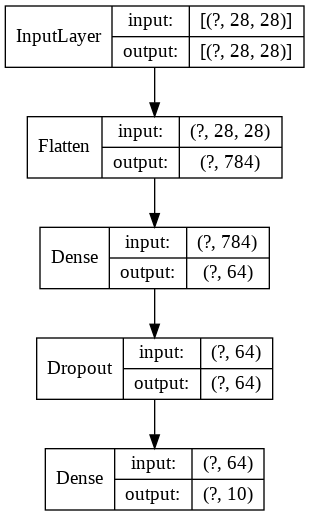

In [0]:
# model.summary()
print()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, expand_nested=True)

In [0]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Train the model
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.3594 - accuracy: 0.8947 - val_loss: 0.1783 - val_accuracy: 0.9464
Epoch 2/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1951 - accuracy: 0.9424 - val_loss: 0.1389 - val_accuracy: 0.9583
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1556 - accuracy: 0.9535 - val_loss: 0.1143 - val_accuracy: 0.9639
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1337 - accuracy: 0.9594 - val_loss: 0.1009 - val_accuracy: 0.9686
Epoch 5/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1185 - accuracy: 0.9632 - val_loss: 0.0985 - val_accuracy: 0.9705
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1111 - accuracy: 0.9656 - val_loss: 0.0940 - val_accuracy: 0.9710
Epoch 7/10
60000/60000 [==============================]

In [0]:
print('Training Accuracy: {}'.format(model.evaluate(x_train, y_train)))
print('Testing Accuracy: {}'.format(model.evaluate(x_test, y_test)))

60000/60000 [==============================] - 4s 62us/sample - loss: 0.0384 - accuracy: 0.9893
Training Accuracy: [0.03840477652025098, 0.98925]
10000/10000 [==============================] - 1s 69us/sample - loss: 0.0875 - accuracy: 0.9742
Testing Accuracy: [0.0874825684550684, 0.9742]


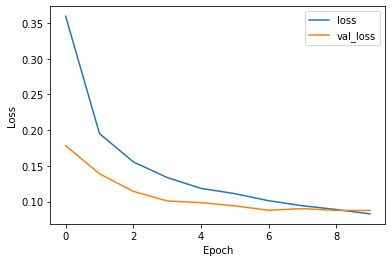

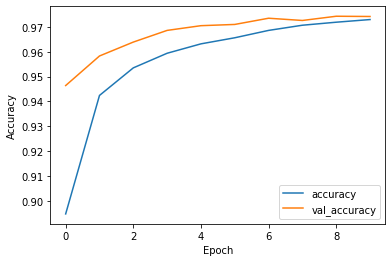

In [0]:
def lossPlot(result):
    plt.plot(result.history['loss'], label='loss')
    plt.plot(result.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#end-def

def accuracyPlot(result):
    plt.plot(result.history['accuracy'], label='accuracy')
    plt.plot(result.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
#end-def

lossPlot(result)
accuracyPlot(result)

[7 2 1 ... 4 5 6]
[[ 970    0    1    2    1    1    3    1    1    0]
 [   0 1121    3    2    0    0    1    1    7    0]
 [   3    1 1005    2    2    0    2    9    8    0]
 [   0    0    5  990    0    5    0    5    5    0]
 [   1    0    6    0  957    0    4    2    2   10]
 [   3    1    0   14    2  856    5    2    7    2]
 [   7    3    1    1    5    3  934    1    3    0]
 [   1    5   13    1    0    0    0 1000    3    5]
 [   7    1    1    4    4    1    2    5  944    5]
 [   4    3    0    7   12    2    0   10    6  965]]
Confusion matrix, without normalization
[[ 970    0    1    2    1    1    3    1    1    0]
 [   0 1121    3    2    0    0    1    1    7    0]
 [   3    1 1005    2    2    0    2    9    8    0]
 [   0    0    5  990    0    5    0    5    5    0]
 [   1    0    6    0  957    0    4    2    2   10]
 [   3    1    0   14    2  856    5    2    7    2]
 [   7    3    1    1    5    3  934    1    3    0]
 [   1    5   13    1    0    0    0 100

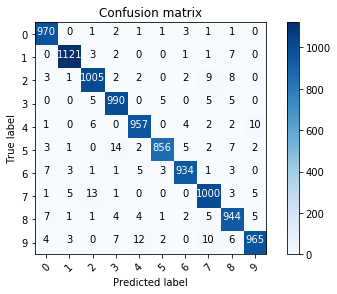

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
y_test = y_test.argmax(axis=1)
print(p_test)

cm = confusion_matrix(y_test, p_test)
print(cm)
plot_confusion_matrix(cm, list(range(10)))

# # Do these results make sense?
# # It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

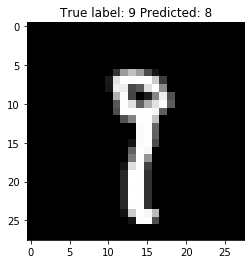

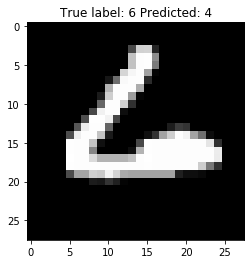

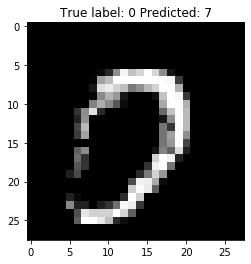

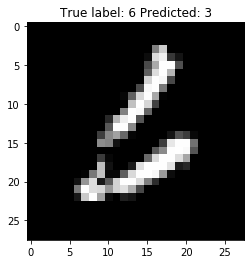

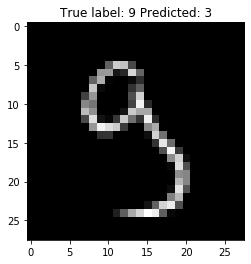

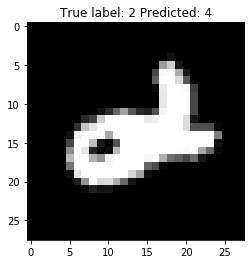

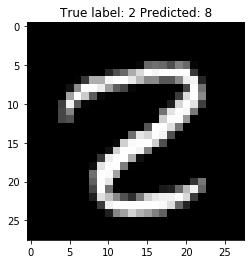

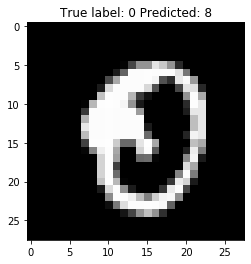

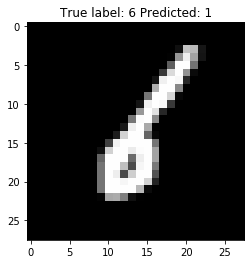

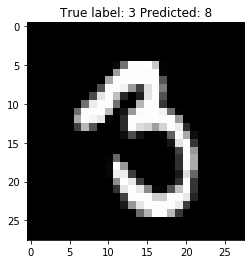

In [0]:
# Show some misclassified examples
for _ in range(10):
    misclassified_idx = np.where(p_test != y_test)[0]
    i = np.random.choice(misclassified_idx)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))
    plt.show()

In [0]:
np.where(p_test != y_test)

(array([  33,  247,  259,  320,  321,  340,  381,  445,  448,  495,  582,
         583,  613,  619,  691,  720,  740,  810,  846,  881,  882,  924,
         938,  947,  951,  956,  965, 1003, 1014, 1032, 1039, 1044, 1112,
        1128, 1156, 1181, 1182, 1226, 1232, 1242, 1247, 1260, 1299, 1319,
        1326, 1393, 1500, 1522, 1530, 1549, 1553, 1554, 1581, 1607, 1609,
        1678, 1681, 1709, 1717, 1751, 1754, 1790, 1878, 1901, 1938, 1941,
        1952, 2004, 2016, 2024, 2033, 2035, 2040, 2043, 2044, 2053, 2093,
        2109, 2129, 2130, 2135, 2182, 2237, 2272, 2293, 2369, 2380, 2387,
        2406, 2414, 2422, 2462, 2488, 2526, 2534, 2582, 2607, 2610, 2654,
        2760, 2810, 2863, 2896, 2927, 2939, 2970, 3005, 3060, 3073, 3117,
        3269, 3336, 3422, 3490, 3503, 3520, 3533, 3549, 3558, 3565, 3597,
        3662, 3674, 3681, 3718, 3749, 3751, 3757, 3776, 3796, 3808, 3818,
        3838, 3853, 3869, 3893, 3906, 3941, 3985, 4065, 4075, 4078, 4093,
        4140, 4163, 4176, 4193, 4201, 

### CNN Architecture for MNIST (Handwritten)

In [0]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to X
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)

x_train = x_train.reshape(60000, 784, 1)
x_test  = x_test.reshape(10000, 784, 1)

print("x_train.shape:", x_train.shape)


# Class Encoding
y_train = oneZeroEncoding(y_train)
y_test = oneZeroEncoding(y_test)

x_train.shape: (60000, 784, 1)
10
10


In [0]:
x_train[0].shape

(784, 1)

In [0]:
def Network():
    i = Input(shape=(784,1))
    x = Conv1D(filters=16, kernel_size=3, activation='relu')(i)
    x = Flatten()(x)       # Because dense layer expect 1-D vector
    x = Dense(units=10, activation='softmax')(x)
    
    return Model(inputs=[i], outputs=[x])
#end-def

model = Network()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 782, 16)           64        
_________________________________________________________________
flatten_1 (Flatten)          (None, 12512)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                125130    
Total params: 125,194
Trainable params: 125,194
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Train the model
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 192us/sample - loss: 0.2937 - accuracy: 0.9169 - val_loss: 0.1843 - val_accuracy: 0.9483
Epoch 2/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1696 - accuracy: 0.9493 - val_loss: 0.1670 - val_accuracy: 0.9501
Epoch 3/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1416 - accuracy: 0.9582 - val_loss: 0.1632 - val_accuracy: 0.9492
Epoch 4/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1251 - accuracy: 0.9625 - val_loss: 0.1499 - val_accuracy: 0.9552
Epoch 5/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1145 - accuracy: 0.9647 - val_loss: 0.1499 - val_accuracy: 0.9550
Epoch 6/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1045 - accuracy: 0.9685 - val_loss: 0.1478 - val_accuracy: 0.9564
Epoch 7/10
60000/60000 [=========================

In [0]:
help(Conv1D.__init__)

Help on function __init__ in module tensorflow.python.keras.layers.convolutional:

__init__(self, filters, kernel_size, strides=1, padding='valid', data_format='channels_last', dilation_rate=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)



### CNN Architecture for MNIST (Fashion)

In [0]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [0]:
# Class Encoding
# y_train = oneZeroEncoding(y_train)
# y_test = oneZeroEncoding(y_test)

y_train = labelEncoding(y_train, dtype=int)
y_test  = labelEncoding(y_test, dtype=int)

In [0]:
y_test.shape

(10000, 10)

In [0]:
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
x_train[0].shape

(28, 28, 1)

In [0]:
def Network(inputShape):
    i = Input(shape=(inputShape))
    x = Conv2D(filters=32,  kernel_size=(3,3), strides=2, activation='relu')(i)
    x = BatchNormalization()(x)
    x = Conv2D(filters=64,  kernel_size=(3,3), strides=2, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=128, kernel_size=(3,3), strides=2, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)        # Because dense layer expect 1-D vector
    x = Dropout(rate=0.25,)(x)
    x = Dense(units=512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.25)(x)
    x = Dense(units=10, activation='softmax')(x)
    
    return Model(inputs=[i], outputs=[x])
#end-def

model = Network(x_train[0].shape)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
batch_normalization_6 (Batch (None, 2, 2, 128)         512 

In [0]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Train the model
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.5294 - accuracy: 0.8103 - val_loss: 0.3901 - val_accuracy: 0.8548
Epoch 2/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3731 - accuracy: 0.8626 - val_loss: 0.3841 - val_accuracy: 0.8478
Epoch 3/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3291 - accuracy: 0.8781 - val_loss: 0.3260 - val_accuracy: 0.8793
Epoch 4/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2997 - accuracy: 0.8890 - val_loss: 0.2988 - val_accuracy: 0.8909
Epoch 5/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2761 - accuracy: 0.8970 - val_loss: 0.3145 - val_accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2540 - accuracy: 0.9052 - val_loss: 0.2773 - val_accuracy: 0.9013
Epoch 7/10
60000/60000 [=========================

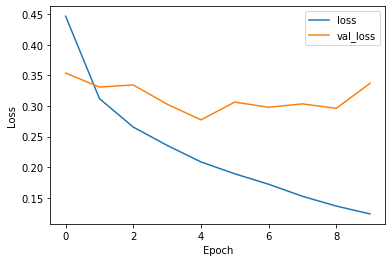

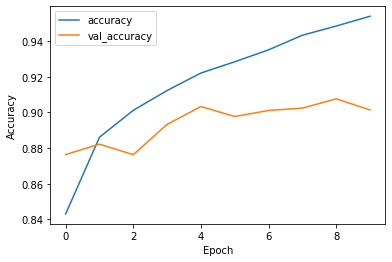

In [0]:
def lossPlot(result):
    plt.plot(result.history['loss'], label='loss')
    plt.plot(result.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#end-def

def accuracyPlot(result):
    plt.plot(result.history['accuracy'], label='accuracy')
    plt.plot(result.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
#end-def

lossPlot(result)
accuracyPlot(result)

### CNN Architecture for CIFAR-10

In [0]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [0]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [0]:
y_train = labelEncoding(y_train, dtype=int)
y_test  = labelEncoding(y_test, dtype=int)

In [0]:
y_train.shape

(50000, 10)

In [0]:
y_test.shape

(10000, 10)

In [0]:
x_train[0].shape

(32, 32, 3)

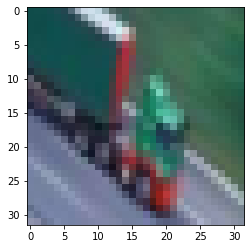

In [0]:
plt.imshow(x_train[50])
plt.show()

In [0]:
def Network(inputShape):
    i = Input(shape=(inputShape))
    x = Conv2D(filters=32,  kernel_size=(3,3), strides=1, padding='same', activation='relu')(i)
    x = BatchNormalization()(x)
    x = Conv2D(filters=32,  kernel_size=(3,3), strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    print(x.shape)

    x = Conv2D(filters=64,  kernel_size=(3,3), strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    print(x.shape)

    x = Conv2D(filters=64,  kernel_size=(3,3), strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

    x = Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

    x = Flatten()(x)         # Because dense layer expect 1-D vector
    x = Dropout(rate=0.25,)(x)

    x = Dense(units=1024, activation='relu')(x)
    # x = BatchNormalization()(x)
    x = Dropout(rate=0.20)(x)
    x = Dense(units=10, activation='softmax')(x)

    return Model(inputs=[i], outputs=[x])
#end-def

model = Network(x_train[0].shape)
model.summary()
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, expand_nested=True)

(None, 16, 16, 32)
(None, 16, 16, 64)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)      

In [0]:
# Compile the model:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
)

# Watch Tower:
monitor = EarlyStopping(monitor='val_loss', verbose=1, patience=3)

# Train the model:
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], epochs=25) # Epoch doesn't work when 

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 20s 398us/sample - loss: 1.3346 - accuracy: 0.5446 - val_loss: 1.2106 - val_accuracy: 0.5786
Epoch 2/25
50000/50000 [==============================] - 11s 226us/sample - loss: 0.8584 - accuracy: 0.7019 - val_loss: 0.8661 - val_accuracy: 0.7023
Epoch 3/25
50000/50000 [==============================] - 11s 224us/sample - loss: 0.7064 - accuracy: 0.7546 - val_loss: 0.6873 - val_accuracy: 0.7675
Epoch 4/25
50000/50000 [==============================] - 11s 228us/sample - loss: 0.5945 - accuracy: 0.7964 - val_loss: 0.9007 - val_accuracy: 0.7108
Epoch 5/25
50000/50000 [==============================] - 11s 227us/sample - loss: 0.5110 - accuracy: 0.8253 - val_loss: 0.6603 - val_accuracy: 0.7862
Epoch 6/25
50000/50000 [==============================] - 12s 238us/sample - loss: 0.4418 - accuracy: 0.8467 - val_loss: 0.6221 - val_accuracy: 0.8033
Epoch 7/25
50000/50000 [====================

Training Accuracy: 0.9689
Testing  Accuracy: 0.8274




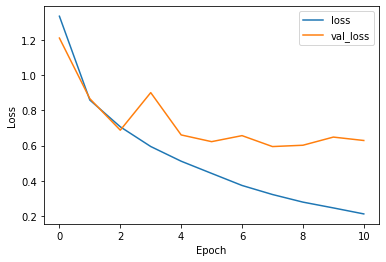

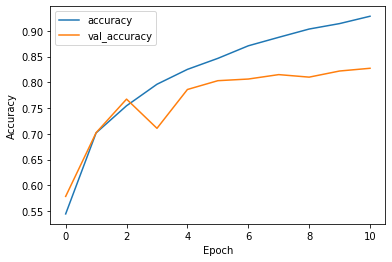

In [0]:
def performance(Xtrain, Ytrain, Xtest, Ytest):
    print('Training Accuracy: {:.4f}'.format(model.evaluate(Xtrain, Ytrain, verbose=0)[1]))
    print('Testing  Accuracy: {:.4f}'.format(model.evaluate(Xtest,  Ytest,  verbose=0)[1]))
    print('\n')
    lossPlot(result)
    accuracyPlot(result)
#end-def

performance(x_train, y_train,x_test, y_test)

In [0]:
pYtest = np.argmax(model.predict(x_test), axis=1)
CM = confusion_matrix(y_pred=pYtest, y_true=y_test.argmax(axis=1))
print(CM)

print(classification_report(y_pred=pYtest, y_true=y_test.argmax(axis=1)))

[[884  10  22  21   3   3   4   2  37  14]
 [ 10 908   3   5   1   3   3   0  27  40]
 [ 59   0 755  34  69  25  32   8  12   6]
 [ 24   3  76 729  28  92  26   9   9   4]
 [ 21   3  49  36 827  25  19  16   3   1]
 [ 14   3  53 139  29 730  10  14   6   2]
 [  7   3  47  47  28  16 836   2  10   4]
 [ 21   2  36  48  30  39   4 807   5   8]
 [ 53   4   6   5   1   0   3   0 916  12]
 [ 29  49   4   8   1   2   3   2  20 882]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1000
           1       0.92      0.91      0.91      1000
           2       0.72      0.76      0.74      1000
           3       0.68      0.73      0.70      1000
           4       0.81      0.83      0.82      1000
           5       0.78      0.73      0.75      1000
           6       0.89      0.84      0.86      1000
           7       0.94      0.81      0.87      1000
           8       0.88      0.92      0.90      1000
           9       0.91     

In [0]:
help(MaxPooling2D.__init__)

Help on function __init__ in module tensorflow.python.keras.layers.pooling:

__init__(self, pool_size=(2, 2), strides=None, padding='valid', data_format=None, **kwargs)

